In [116]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utils import *

# Data Preparation

In [177]:
move_data = pd.read_csv('data/move_data.csv', index_col=0)
move_data

,work_id,author_id,institution_id,move_time,next_work,next_ins,prev_ins,prev_work,leave_time,stay_time
334318281,W2119512358,A5000000072,I153718931,2015-01-01,W2698937230,I153718931,NaN,NaN,2019-01-01,1461 days
102025449,W2980455904,A5000000072,I198243066,2019-01-01,W2937736128,I198243066,I153718931,W2698937230,NaN,NaN
575636339,W1974959902,A5000000092,I131249849,1989-05-01,W1931087167,I74760111,NaN,NaN,2002-11-23,4954 days
435973848,W1931087167,A5000000092,I74760111,2002-11-23,W2074136998,I74760111,I131249849,W1974959902,2014-01-01,4057 days
89820042,W1969045824,A5000000092,I16076960,2014-01-01,W2339833875,I16076960,I74760111,W2040021470,2020-10-11,2475 days
...,...,...,...,...,...,...,...,...,...,...
717099203,W2791597424,A5098902050,I111236770,2018-03-12,W2793257615,I111236770,I111236770,W2777240065,2023-04-14,1859 days
730364269,W4365483418,A5098902050,I111236770,2023-04-14,W4381662154,I111236770,I111236770,W4317378727,NaN,NaN
412469905,W4385888121,A9999999999,I1290463931,1973-10-01,W4242537482,I4210140884,NaN,W4239162299,1990-05-01,6056 days
455943907,W4300935765,A9999999999,I142740786,1990-05-01,W4246209584,I129975664,I1290463931,W4300032867,2024-03-25,12382 days


In [41]:
target_ins = move_data['next_ins'].value_counts()
target_ins

next_ins
I27837315      35574
I74801974      35133
I97018004      33884
I17974374      33569
I201448701     31209
               ...  
I4210095117        1
I4210086108        1
I4210149773        1
I4210101284        1
I3131198051        1
Name: count, Length: 64246, dtype: int64

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

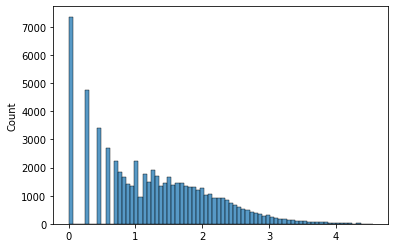

In [42]:
sns.histplot(np.log10(target_ins.values))

In [43]:
with open('data/institution_geo24.pkl', 'rb') as f:
    institution_geo = pickle.load(f)
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude
0,I220871436,NaN,NaN,FR,NaN,48.848610,2.342780
1,I4210140407,Portland,Oregon,US,United States,45.525047,-122.672940
2,I4210121796,London,NaN,GB,United Kingdom,51.544495,-0.056045
3,I2800206933,Vienna,NaN,AT,Austria,48.204475,16.357422
4,I2802204158,Salem,Oregon,US,United States,44.886715,-123.031906
...,...,...,...,...,...,...,...
108136,I4394709273,Washington,NaN,NaN,United States,38.895110,-77.036370
108137,I4394709274,Delft,NaN,NaN,The Netherlands,52.006670,4.355560
108138,I4394709279,Washington,NaN,NaN,United States,38.895110,-77.036370
108139,I82930923,London,NaN,GB,United Kingdom,51.531994,-0.119311


In [44]:
move_data.isna().sum()

work_id                 0
author_id               0
institution_id          0
move_time               0
next_work          902532
next_ins           902532
prev_ins          4107966
prev_work         2797603
leave_time        4107966
stay_time         4107966
dtype: int64

In [1]:
move_data = move_data[['institution_id', 'move_time', 'prev_ins', 'stay_time']]
move_data

NameError: name 'move_data' is not defined

In [46]:
move_data.isna().sum()

institution_id          0
move_time               0
prev_ins          4107966
stay_time         4107966
dtype: int64

In [47]:
#drop first_time publications
move_data.dropna(subset='prev_ins', inplace=True)
move_data

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/3108517570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move_data.dropna(subset='prev_ins', inplace=True)


,institution_id,move_time,prev_ins,stay_time
102025449,I198243066,2019-01-01,I153718931,NaN
435973848,I74760111,2002-11-23,I131249849,4057 days
89820042,I16076960,2014-01-01,I74760111,2475 days
243097156,I131249849,2020-10-11,I16076960,1177 days
646774361,I131249849,2024-01-01,I131249849,NaN
...,...,...,...,...
711054271,I111236770,2006-09-01,I111236770,4210 days
717099203,I111236770,2018-03-12,I111236770,1859 days
730364269,I111236770,2023-04-14,I111236770,NaN
455943907,I142740786,1990-05-01,I1290463931,12382 days


/opt/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

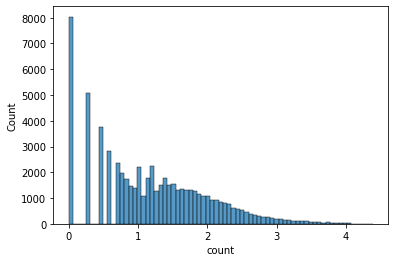

In [48]:
sns.histplot(np.log10(move_data['institution_id'].value_counts()))

In [49]:
institution_geo.dropna(subset=["city", 'country_code'], inplace=True)

ccframe = pd.read_csv('data/country-and-continent-codes-list-csv.csv')

def get_continent(country_code):
    
    if country_code == 'XK':
        con = 'EU'
    else:
        con =  str(ccframe.loc[ccframe['Two_Letter_Country_Code'] == country_code ]['Continent_Code'].values[0])
    if(con != 'nan'):
        return con
    else:
        return'NA'
        ## Pandas 好像会自动把美洲的code ”NA“ 转化成NaN，所以要特判一下


In [50]:
institution_geo['continent_code'] = institution_geo['country_code'].apply(get_continent)

In [51]:
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude,continent_code
1,I4210140407,Portland,Oregon,US,United States,45.525047,-122.672940,NA
2,I4210121796,London,NaN,GB,United Kingdom,51.544495,-0.056045,EU
3,I2800206933,Vienna,NaN,AT,Austria,48.204475,16.357422,EU
4,I2802204158,Salem,Oregon,US,United States,44.886715,-123.031906,NA
5,I2998552023,Los Angeles,California,US,United States,34.046494,-118.250730,NA
...,...,...,...,...,...,...,...,...
107410,I4210167378,Seoul,NaN,KR,South Korea,37.527344,126.885635,AS
107430,I4387154366,Paris,NaN,FR,France,48.853410,2.348800,EU
107433,I4387155155,Barcelona,NaN,ES,Spain,41.388790,2.158990,EU
108139,I82930923,London,NaN,GB,United Kingdom,51.531994,-0.119311,EU


In [52]:
institutions = move_data['institution_id'].unique()
institution_geo = institution_geo[institution_geo['institution_id'].isin(institutions)]
continents = institution_geo['continent_code'].unique()
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude,continent_code
484,I4210142806,Boone,North Carolina,US,United States,36.199036,-81.652270,NA
485,I4210103515,Rubano,NaN,IT,Italy,45.425476,11.789450,EU
489,I4210117313,San Diego,California,US,United States,32.714620,-117.151380,NA
490,I4210124511,Philadelphia,Pennsylvania,US,United States,39.952330,-75.163790,NA
495,I4210159736,Neuchâtel,NaN,CH,Switzerland,46.997750,6.945283,EU
...,...,...,...,...,...,...,...,...
106838,I4210106561,Grosse Pointe Farms,Michigan,US,United States,42.407436,-82.895584,NA
107143,I4210138289,Milton,Queensland,AU,Australia,-27.467762,153.006040,OC
107191,I4210143133,New Delhi,NaN,IN,India,28.624348,77.191010,AS
107348,I4210159722,Arlington,NaN,US,United States,38.881010,-77.104280,NA


In [53]:
move_data

,institution_id,move_time,prev_ins,stay_time
102025449,I198243066,2019-01-01,I153718931,NaN
435973848,I74760111,2002-11-23,I131249849,4057 days
89820042,I16076960,2014-01-01,I74760111,2475 days
243097156,I131249849,2020-10-11,I16076960,1177 days
646774361,I131249849,2024-01-01,I131249849,NaN
...,...,...,...,...
711054271,I111236770,2006-09-01,I111236770,4210 days
717099203,I111236770,2018-03-12,I111236770,1859 days
730364269,I111236770,2023-04-14,I111236770,NaN
455943907,I142740786,1990-05-01,I1290463931,12382 days


In [54]:
move_data = move_data.merge(right=institution_geo[['institution_id', 'city', 'country_code', 'continent_code']], 
                how='left', on='institution_id')
move_data

,institution_id,move_time,prev_ins,stay_time,city,country_code,continent_code
0,I198243066,2019-01-01,I153718931,NaN,Heredia,CR,NA
1,I74760111,2002-11-23,I131249849,4057 days,Dallas,US,NA
2,I16076960,2014-01-01,I74760111,2475 days,Islamabad,PK,AS
3,I131249849,2020-10-11,I16076960,1177 days,Corvallis,US,NA
4,I131249849,2024-01-01,I131249849,NaN,Corvallis,US,NA
...,...,...,...,...,...,...,...
8064727,I111236770,2006-09-01,I111236770,4210 days,Burlington,US,NA
8064728,I111236770,2018-03-12,I111236770,1859 days,Burlington,US,NA
8064729,I111236770,2023-04-14,I111236770,NaN,Burlington,US,NA
8064730,I142740786,1990-05-01,I1290463931,12382 days,Louisville,US,NA


In [55]:
move_data.to_csv('data/movements_df.csv')

# Attractiveness Estimation

In [56]:
target_ins = move_data['institution_id'].value_counts()
target_ins

institution_id
I27837315      24287
I97018004      24252
I74801974      23504
I17974374      23472
I201448701     23145
               ...  
I4210134631        1
I4210108475        1
I2801015573        1
I4210088860        1
I2802512847        1
Name: count, Length: 63203, dtype: int64

## Continents

Get the attractiveness of each continent

In [59]:
move_data['move_time'] = pd.to_datetime(move_data['move_time'])

def get_year(time):
    return time.year

move_data['move_year'] = move_data['move_time'].apply(get_year)
move_data

,institution_id,move_time,prev_ins,stay_time,city,country_code,continent_code,move_year
0,I198243066,2019-01-01,I153718931,NaN,Heredia,CR,NA,2019
1,I74760111,2002-11-23,I131249849,4057 days,Dallas,US,NA,2002
2,I16076960,2014-01-01,I74760111,2475 days,Islamabad,PK,AS,2014
3,I131249849,2020-10-11,I16076960,1177 days,Corvallis,US,NA,2020
4,I131249849,2024-01-01,I131249849,NaN,Corvallis,US,NA,2024
...,...,...,...,...,...,...,...,...
8064727,I111236770,2006-09-01,I111236770,4210 days,Burlington,US,NA,2006
8064728,I111236770,2018-03-12,I111236770,1859 days,Burlington,US,NA,2018
8064729,I111236770,2023-04-14,I111236770,NaN,Burlington,US,NA,2023
8064730,I142740786,1990-05-01,I1290463931,12382 days,Louisville,US,NA,1990


In [103]:
con_atr = pd.DataFrame(columns=continents)

for year in range(1960, 2021, 5):
    slice_data = move_data[ (move_data['move_year'] >= year) & (move_data['move_year']<(year+5))]
    con_atr_slice = dict()
    sum = len(slice_data)
    for continent in continents:
        con_atr_slice[continent] = len(slice_data[slice_data['continent_code'] == continent]) / sum
    df_slice = pd.DataFrame([con_atr_slice], index=['%d-%d'%(year, year+5)])
    con_atr = pd.concat([con_atr,df_slice])

con_atr

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/1249315450.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  con_atr = pd.concat([con_atr,df_slice])


,NA,EU,AF,AS,SA,OC
1960-1965,0.567005,0.304962,0.009417,0.088012,0.007063,0.023542
1965-1970,0.543050,0.312114,0.008761,0.102426,0.006684,0.026965
1970-1975,0.506670,0.329450,0.009438,0.118744,0.007833,0.027865
1975-1980,0.468174,0.353258,0.009833,0.132489,0.008860,0.027387
1980-1985,0.457408,0.358045,0.009239,0.139099,0.010620,0.025589
1985-1990,0.443562,0.364654,0.009878,0.145449,0.011704,0.024753
1990-1995,0.413377,0.382323,0.009014,0.155616,0.013960,0.025711
1995-2000,0.375643,0.398309,0.008823,0.170422,0.020105,0.026699
2000-2005,0.351395,0.397753,0.010007,0.187809,0.027156,0.025879
2005-2010,0.320232,0.394692,0.012431,0.209787,0.036093,0.026764


In [105]:
con_atr.to_csv('data/attrativeness_continent.csv')

## Countries

In [114]:
countries

array(['PK', 'CN', 'SG', 'KR', 'JP', 'MY', 'TW', 'IN', 'ID', 'TH', 'HK',
       'IL', 'IR', 'VN', 'SY', 'SA', 'BD', 'NP', 'AE', 'MV', 'IQ', 'MO',
       'KW', 'PH', 'OM', 'QA', 'JO', 'LK', 'BH', 'LB', 'PS', 'TJ', 'UZ',
       'MN', 'LA', 'KG', 'YE', 'KH', 'BN', 'MM', 'TM', 'AF', 'BT', 'KP',
       'TL'], dtype=object)

In [115]:
continent = 'AS'
continent_movement = move_data[move_data['continent_code'] == continent]
countries = continent_movement['country_code'].unique()

cou_atr = pd.DataFrame(columns=countries)
print(cou_atr)
for year in range(1960, 2021, 5):
    slice_data = continent_movement[ (continent_movement['move_year'] >= year)
                                    & (continent_movement['move_year'] < (year+5))]
    cou_atr_slice = dict()
    sum = len(slice_data)
    for country in countries:
        cou_atr_slice[country] = len(slice_data[slice_data['country_code']==country]) / sum
    df_slice = pd.DataFrame([cou_atr_slice], index=['%d-%d'%(year, year+5)])
    cou_atr = pd.concat([cou_atr, df_slice])

cou_atr

Empty DataFrame
Columns: [PK, CN, SG, KR, JP, MY, TW, IN, ID, TH, HK, IL, IR, VN, SY, SA, BD, NP, AE, MV, IQ, MO, KW, PH, OM, QA, JO, LK, BH, LB, PS, TJ, UZ, MN, LA, KG, YE, KH, BN, MM, TM, AF, BT, KP, TL]
Index: []

[0 rows x 45 columns]


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/2423097562.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


,PK,CN,SG,KR,JP,MY,TW,IN,ID,TH,...,KG,YE,KH,BN,MM,TM,AF,BT,KP,TL
1960-1965,0.000000,0.018519,0.004115,0.004115,0.726337,0.006173,0.004115,0.125514,0.000000,0.006173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1965-1970,0.003055,0.013052,0.002222,0.003610,0.695918,0.005554,0.003888,0.150791,0.000000,0.004999,...,0.000000,0.000000,0.000000,0.000555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-1975,0.004138,0.012537,0.003651,0.003773,0.675268,0.005599,0.004260,0.165287,0.000487,0.003165,...,0.000000,0.000000,0.000122,0.000730,0.000365,0.000000,0.000122,0.000000,0.000000,0.000000
1975-1980,0.004403,0.012159,0.003704,0.004542,0.693431,0.003494,0.006359,0.152900,0.000419,0.002376,...,0.000000,0.000000,0.000489,0.000280,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000
1980-1985,0.003440,0.014025,0.005204,0.007718,0.698452,0.003352,0.007939,0.138358,0.000529,0.002955,...,0.000000,0.000044,0.001323,0.000353,0.000221,0.000000,0.000000,0.000000,0.000044,0.000000
1985-1990,0.005322,0.033002,0.005929,0.014057,0.679817,0.002777,0.017267,0.122433,0.000781,0.003413,...,0.000000,0.000145,0.000578,0.000174,0.000521,0.000000,0.000000,0.000000,0.000000,0.000000
1990-1995,0.005085,0.062452,0.008480,0.028531,0.642196,0.003072,0.033472,0.112093,0.001150,0.003611,...,0.000036,0.000072,0.000395,0.000359,0.000341,0.000054,0.000000,0.000000,0.000000,0.000000
1995-2000,0.004376,0.106048,0.012615,0.058267,0.569626,0.003994,0.052815,0.092967,0.002403,0.004663,...,0.000024,0.000072,0.000239,0.000191,0.000275,0.000036,0.000000,0.000000,0.000000,0.000000
2000-2005,0.004059,0.181615,0.016720,0.079674,0.467110,0.005128,0.061451,0.086954,0.002769,0.006378,...,0.000047,0.000055,0.000103,0.000174,0.000166,0.000024,0.000000,0.000000,0.000000,0.000000
2005-2010,0.006123,0.284489,0.016525,0.086962,0.343635,0.007556,0.063704,0.089961,0.005219,0.008581,...,0.000086,0.000071,0.000156,0.000121,0.000182,0.000015,0.000020,0.000005,0.000005,0.000000


In [117]:
continents

array(['NA', 'EU', 'AF', 'AS', 'SA', 'OC'], dtype=object)

In [127]:
from utils import *

def attr_within_continent(move_data, continent):
    continent_movement = move_data[move_data['continent_code'] == continent]
    countries = continent_movement['country_code'].unique()
    cou_atr = pd.DataFrame(columns=countries)
    for year in range(1960, 2021, 5):
        slice_data = continent_movement[ (continent_movement['move_year'] >= year)
                                        & (continent_movement['move_year'] < (year+5))]
        cou_atr_slice = dict()
        sum = len(slice_data)
        for country in countries:
            cou_atr_slice[country] = len(slice_data[slice_data['country_code']==country]) / sum
        df_slice = pd.DataFrame([cou_atr_slice], index=['%d-%d'%(year, year+5)])
        cou_atr = pd.concat([cou_atr, df_slice])
    sorted_colums = cou_atr.iloc[-1].sort_values(ascending=False).index
    cou_atr = cou_atr[sorted_colums]
    return cou_atr

In [128]:
writer = pd.ExcelWriter('data/attractiveness_countries.xlsx')
for continent in continents:
    cou_atr = attr_within_continent(move_data=move_data, 
                                    continent=continent)
    cou_atr.to_excel(writer, sheet_name=continent)
writer.close()

Empty DataFrame
Columns: [CR, US, MX, CU, CA, PA, PR, NI, GP, BS, TT, JM, VG, GT, HN, BM, SV, MS, GL, MQ, AW, HT, DO, BB, VI, CW, KN, KY, BZ, AG, GD, SX, DM, VC, TC, LC]
Index: []

[0 rows x 36 columns]


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


Empty DataFrame
Columns: [ES, FR, PL, NL, IE, DK, SE, GR, NO, GB, BE, DE, PT, RU, IT, BG, HU, TR, CH, FI, AT, RO, CZ, UA, SI, CY, SK, LI, RS, BY, HR, MK, EE, GE, AM, FO, KZ, IS, LV, BA, LU, MT, AL, AZ, LT, MD, XK, AD, ME, IM, MC, GI, JE, SM, SJ, VA, AX]
Index: []

[0 rows x 57 columns]


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


Empty DataFrame
Columns: [NG, BW, ZA, UG, EG, KE, MA, ET, GH, AO, TN, SN, ML, BJ, ZW, TZ, ZM, SL, SS, DZ, GM, CM, LY, BI, CI, MG, BF, RE, GN, MW, GA, MZ, NE, TG, GW, CD, SZ, LS, SD, CG, ST, CF, LR, MR, SC, RW, CV, MU, ER, SO, GQ, TD, DJ]
Index: []

[0 rows x 53 columns]


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


Empty DataFrame
Columns: [PK, CN, SG, KR, JP, MY, TW, IN, ID, TH, HK, IL, IR, VN, SY, SA, BD, NP, AE, MV, IQ, MO, KW, PH, OM, QA, JO, LK, BH, LB, PS, TJ, UZ, MN, LA, KG, YE, KH, BN, MM, TM, AF, BT, KP, TL]
Index: []

[0 rows x 45 columns]


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


Empty DataFrame
Columns: [BR, CL, AR, UY, CO, PE, VE, BO, EC, GF, PY, FK, SR, GY]
Index: []


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


Empty DataFrame
Columns: [AU, NZ, FJ, NC, GU, PG, PF, TO, WS, PW, AS, SB, VU, KI, FM, MP]
Index: []


/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/189077975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cou_atr = pd.concat([cou_atr, df_slice])


## Cities

In [134]:
country = 'CN'
country_movement = move_data[move_data['country_code']==country]
cities = country_movement['city'].unique()
city_atr = pd.DataFrame(columns=cities)
for year in range(1960, 2021, 5):
    slice_data = country_movement[(country_movement['move_year'] >= year)
                                  & (country_movement['move_year']<(year+5))]
    city_atr_slice = dict()
    sum = len(slice_data)
    for city in cities:
        city_atr_slice[city] = len(slice_data[
            slice_data['city'] == city 
        ]) / sum
    df_slice = pd.DataFrame([city_atr_slice], 
                            index=['%d-%d'%(year, year+5)])
    city_atr = pd.concat([city_atr, df_slice])

sorted_colums = city_atr.iloc[-1].sort_values(ascending=False).index
city_atr = city_atr[sorted_colums]
city_atr

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/1077303489.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  city_atr = pd.concat([city_atr, df_slice])


,Nanjing,Hong Kong,Yangzhou,Guangzhou,Ningbo,Wenzhou,Changsha,Chongqing,Beijing,Wuhan,...,Wanchai,Tianmen,xinyu shi,Longkou,Zijin,Jiangxiangzhen,Qihe,Linxia Chengguanzhen,Shouguang,Ninghai
1960-1965,0.222222,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1965-1970,0.063830,0.148936,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000,0.255319,0.021277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-1975,0.029126,0.135922,0.000000,0.009709,0.000000,0.000000,0.000000,0.000000,0.281553,0.019417,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-1980,0.051724,0.218391,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.270115,0.005747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1980-1985,0.031447,0.210692,0.000000,0.012579,0.003145,0.000000,0.000000,0.000000,0.320755,0.006289,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985-1990,0.041192,0.129711,0.000000,0.014899,0.000876,0.000000,0.004382,0.006135,0.348817,0.036810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990-1995,0.050921,0.083717,0.000288,0.021001,0.000575,0.000000,0.012371,0.004891,0.343211,0.035098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995-2000,0.060548,0.082647,0.001804,0.025595,0.000226,0.000451,0.014658,0.006765,0.333409,0.044086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-2005,0.051629,0.052370,0.002614,0.034594,0.002396,0.001481,0.021436,0.013071,0.280629,0.052327,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000000
2005-2010,0.052055,0.028316,0.002874,0.041126,0.003247,0.002732,0.025549,0.020244,0.216951,0.052286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [149]:
def attr_within_country(move_data, country):
    country_movement = move_data[move_data['country_code']==country]
    cities = country_movement['city'].unique()
    city_atr = pd.DataFrame(columns=cities)
    for year in range(1960, 2021, 5):
        slice_data = country_movement[(country_movement['move_year'] >= year)
                                    & (country_movement['move_year']<(year+5))]
        city_atr_slice = dict()
        sum = len(slice_data)
        if sum != 0:
            for city in cities:
                city_atr_slice[city] = len(slice_data[
                    slice_data['city'] == city 
                ]) / sum
        else:
            for city in cities:
                city_atr_slice[city] = 0
        df_slice = pd.DataFrame([city_atr_slice], 
                                index=['%d-%d'%(year, year+5)])
        city_atr = pd.concat([city_atr, df_slice])

    sorted_colums = city_atr.iloc[-1].sort_values(ascending=False).index
    city_atr = city_atr[sorted_colums]
    return city_atr

In [148]:
writer = pd.ExcelWriter('data/attractiveness_cities.xlsx')
all_countries = move_data['country_code'].unique()
for country in all_countries:
    city_atr = attr_within_country(move_data, country)
    city_atr.to_excel(writer, sheet_name=country)
writer.close()

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/482240266.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  city_atr = pd.concat([city_atr, df_slice])
/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/482240266.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  city_atr = pd.concat([city_atr, df_slice])
/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_33604/482240266.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA 

# Level Distances

In [151]:
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude,continent_code
484,I4210142806,Boone,North Carolina,US,United States,36.199036,-81.652270,NA
485,I4210103515,Rubano,NaN,IT,Italy,45.425476,11.789450,EU
489,I4210117313,San Diego,California,US,United States,32.714620,-117.151380,NA
490,I4210124511,Philadelphia,Pennsylvania,US,United States,39.952330,-75.163790,NA
495,I4210159736,Neuchâtel,NaN,CH,Switzerland,46.997750,6.945283,EU
...,...,...,...,...,...,...,...,...
106838,I4210106561,Grosse Pointe Farms,Michigan,US,United States,42.407436,-82.895584,NA
107143,I4210138289,Milton,Queensland,AU,Australia,-27.467762,153.006040,OC
107191,I4210143133,New Delhi,NaN,IN,India,28.624348,77.191010,AS
107348,I4210159722,Arlington,NaN,US,United States,38.881010,-77.104280,NA


In [155]:
# institution_geo.rename(columns={'city':'prev_city', 
#                         'country_code':'prev_country', 
#                         'continent_code':'prev_continent'})\
#                             [['institution_id', 'prev_city', 
#                               'prev_country', 'prev_continent']]

,institution_id,prev_city,prev_country,prev_continent
484,I4210142806,Boone,US,NA
485,I4210103515,Rubano,IT,EU
489,I4210117313,San Diego,US,NA
490,I4210124511,Philadelphia,US,NA
495,I4210159736,Neuchâtel,CH,EU
...,...,...,...,...
106838,I4210106561,Grosse Pointe Farms,US,NA
107143,I4210138289,Milton,AU,OC
107191,I4210143133,New Delhi,IN,AS
107348,I4210159722,Arlington,US,NA


In [168]:
institution_id = 'I111236770'
institution_geo[institution_geo['institution_id']
                == institution_id]['continent_code'].iloc[0]

def get_geo_info(institution_id, institution_geo):
    ins_info = institution_geo[institution_geo['institution_id']
                               == institution_id]
    return {'continent': ins_info['continent_code'].iloc[0],
            'country': ins_info['country_code'].iloc[0],
            'city': ins_info['country_code'].iloc[0]}
    
def level_distance(ins_1, ins_2, institution_geo):
    ins_1_info = get_geo_info(ins_1, institution_geo)
    ins_2_info = get_geo_info(ins_2, institution_geo)
    if ins_1_info['continent'] != ins_2_info['continent']:
        return 3
    elif ins_1_info['country'] != ins_2_info['country']:
        return 2
    elif ins_1_info['city'] != ins_2_info['city']:
        return 1
    else: return 0
    
level_distance('I198243066', "I74760111", institution_geo)

2

In [172]:
move_data['level_distance'] = move_data.apply(lambda x: level_distance(x['']))


,institution_id_x,move_time,prev_ins,stay_time,city,country_code,continent_code,move_year,institution_id_y,prev_city,prev_country,prev_continent
0,I198243066,2019-01-01,I153718931,NaN,Heredia,CR,NA,2019,I153718931,Ottawa,CA,NA
1,I74760111,2002-11-23,I131249849,4057 days,Dallas,US,NA,2002,I131249849,Corvallis,US,NA
2,I16076960,2014-01-01,I74760111,2475 days,Islamabad,PK,AS,2014,I74760111,Dallas,US,NA
3,I131249849,2020-10-11,I16076960,1177 days,Corvallis,US,NA,2020,I16076960,Islamabad,PK,AS
4,I131249849,2024-01-01,I131249849,NaN,Corvallis,US,NA,2024,I131249849,Corvallis,US,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
8064727,I111236770,2006-09-01,I111236770,4210 days,Burlington,US,NA,2006,I111236770,Burlington,US,NA
8064728,I111236770,2018-03-12,I111236770,1859 days,Burlington,US,NA,2018,I111236770,Burlington,US,NA
8064729,I111236770,2023-04-14,I111236770,NaN,Burlington,US,NA,2023,I111236770,Burlington,US,NA
8064730,I142740786,1990-05-01,I1290463931,12382 days,Louisville,US,NA,1990,I1290463931,San Antonio,US,NA
